<a href="https://colab.research.google.com/github/hkhajgiwale/deep_learning_imagenett/blob/main/DL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
print(tf.__version__)

2.4.0


In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='imagewoof2', 
                                   untar=True)

1343717376/1343715595 [==============================] - 32s 0us/step


In [ ]:
!pip install tensorflow-gpu==2.4.0

     |████████████████████████████████| 394.7MB 38kB/s 


In [ ]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

/root/.keras/datasets/imagewoof2


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import os
os.chdir("/root/.keras/datasets/imagewoof2/")
!ls


noisy_imagewoof.csv  train  val


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12954 files belonging to 2 classes.
Using 10364 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12954 files belonging to 2 classes.
Using 2590 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['train', 'val']


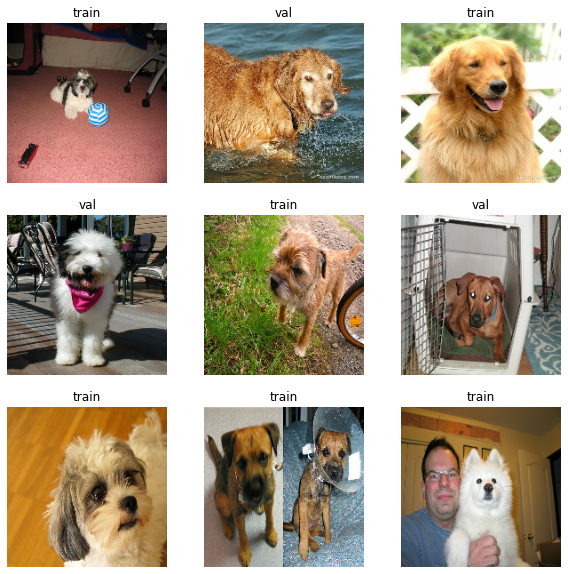

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))



0.0 1.0


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
324/324 [==============================] - 382s 1s/step - loss: 0.6192 - accuracy: 0.6984 - val_loss: 0.6238 - val_accuracy: 0.6900
Epoch 2/5
324/324 [==============================] - 338s 1s/step - loss: 0.6142 - accuracy: 0.6984 - val_loss: 0.6258 - val_accuracy: 0.6900
Epoch 3/5
324/324 [==============================] - 342s 1s/step - loss: 0.6133 - accuracy: 0.6984 - val_loss: 0.6255 - val_accuracy: 0.6900
Epoch 4/5
324/324 [==============================] - 335s 1s/step - loss: 0.6113 - accuracy: 0.6984 - val_loss: 0.6287 - val_accuracy: 0.6900
Epoch 5/5
324/324 [==============================] - 350s 1s/step - loss: 0.6051 - accuracy: 0.6980 - val_loss: 0.6401 - val_accuracy: 0.6900
